## Merging the data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
import datetime
import seaborn as sns


path = "exam-data/flight-scrape-cypern"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

df = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    df = pd.concat([df, current_data])





In [2]:
df

,Unnamed: 0,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp
0,0,63cy,2022-08-07,4t. 05min.,direkte,20:35–01:40+1,Wizz Air,\n256 kr.,https://kayak.dk/s/clickthrough.jsp?ctyp=Spons...,20220506-2313
1,1,63cy,2022-08-07,4t. 05min.,direkte,20:35–01:40+1,Wizz Air,\n187 kr.,https://kayak.dk/book/flight?code=SiCCUS-HO_.1...,20220506-2313
2,2,63cy,2022-08-07,7t. 55min.,1 stop ATH,11:15–20:10,Aegean Airlines,\n641 kr.,https://kayak.dk/book/flight?code=SiCCUS-HO_.1...,20220506-2313
3,3,63cy,2022-08-07,10t. 50min.,1 stop ATH,11:15–23:05,Aegean Airlines,\n641 kr.,https://kayak.dk/book/flight?code=SiCCUS-HO_.1...,20220506-2313
4,4,63cy,2022-08-07,5t. 50min.,1 stop ATH,11:15–18:05,Aegean Airlines,\n798 kr.,https://kayak.dk/book/flight?code=SiCCUS-HO_.1...,20220506-2313
...,...,...,...,...,...,...,...,...,...,...
114,114,63cy,2022-08-09,25t. 45min.,"2 stop SKG, ATH",17:25–20:10+1,Aegean Airlines,\n1.944 kr.,https://kayak.dk/book/flight?code=SiCCaT1vzN.9...,20220506-2319
115,115,63cy,2022-08-09,25t. 45min.,"2 stop SKG, ATH",17:25–20:10+1,Aegean Airlines,\n1.944 kr.,https://kayak.dk/book/flight?code=SiCCaT1vzN.9...,20220506-2319
116,116,63cy,2022-08-09,30t. 55min.,"2 stop SKG, ATH",17:25–01:20+2,Aegean Airlines,\n1.944 kr.,https://kayak.dk/book/flight?code=SiCCaT1vzN.9...,20220506-2319
117,117,63cy,2022-08-09,30t. 55min.,"2 stop SKG, ATH",17:25–01:20+2,Aegean Airlines,\n1.944 kr.,https://kayak.dk/book/flight?code=SiCCaT1vzN.9...,20220506-2319


In [3]:
df['Price'] = [x[1:-5].replace(".","") for x in df['Price']]
df['Price'] = pd.to_numeric(df['Price'])

In [4]:
df = df.sort_values(by=['Price'], ascending=False)
df['Price']

26    5469
75    5330
74    5293
89    5222
64    5220
      ... 
0      480
2      473
0      449
0      256
1      187
Name: Price, Length: 2891, dtype: int64

In [5]:
#Wizz Air, Ryanair
#["Wizz Air","Ryanair"]
def manipulate_list(x):
    x = '["' + x + '"]' 
    x = x.replace(', ', '","')
    return x

df['temp Company names'] = df['Company names']
df['temp Company names'] = df['Company names'].apply(manipulate_list)
df['temp Company names'] = df['temp Company names'].apply(eval)
df['temp Company names']

26         [Aegean Airlines]
75    [SAS, Aegean Airlines]
74    [SAS, Aegean Airlines]
89    [SAS, Aegean Airlines]
64    [SAS, Aegean Airlines]
               ...          
0                  [Ryanair]
2                  [Ryanair]
0                 [Wizz Air]
0                 [Wizz Air]
1                 [Wizz Air]
Name: temp Company names, Length: 2891, dtype: object

In [6]:
#checking if the type is list
for i, l in enumerate(df['temp Company names']):
    print(type(l))
    break

<class 'list'>


## How many times does a company appear in our dataset?

In [7]:

def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

to_1D(df['temp Company names']).value_counts()

Ryanair               664
Aegean Airlines       657
Lufthansa             429
Norwegian             265
SAS                   227
Wizz Air              197
Austrian Airlines     189
Flere flyselskaber    180
LOT                   154
SWISS                  95
easyJet                92
British Airways        79
Blue Air               72
airBaltic              70
Eurowings              56
TUS Airways            53
KLM                    43
Air Serbia             42
Finnair                40
Sky Express            26
Edelweiss Air          19
Vueling                17
Cyprus Airways         17
Royal Jordanian        16
Olympic Air            12
Czech Airlines         11
MEA                     9
Air France              5
Brussels Airlines       5
Smartwings              5
Flyr AS                 3
Egypt Air               2
TUI Fly Belgium         2
Wideroe                 2
Bulgaria Air            2
Transavia               1
EL AL                   1
Pegasus Airlines        1
TUI fly     

In [8]:
df['Company names'].mask(df['Company names'].str.contains(','), 'Flere flyselskaber', inplace=True)
df.head(50)

,Unnamed: 0,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names
26,26,63cy,2022-07-25,7t. 10min.,1 stop ATH,11:25–19:35,Aegean Airlines,5469,https://kayak.dk/book/flight?code=ShAilJe5f-.R...,20220506-2249,[Aegean Airlines]
75,75,63cy,2022-07-16,9t. 25min.,"2 stop FRA, ATH",14:55–01:20+1,Flere flyselskaber,5330,https://kayak.dk/book/flight?code=SfCiIAnLeo.f...,20220506-2157,"[SAS, Aegean Airlines]"
74,74,63cy,2022-07-16,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5293,https://kayak.dk/book/flight?code=SfCiIAnLeo.t...,20220506-2157,"[SAS, Aegean Airlines]"
89,89,63cy,2022-07-30,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5222,https://kayak.dk/book/flight?code=SiAikpXBR-.t...,20220506-2306,"[SAS, Aegean Airlines]"
64,64,63cy,2022-07-17,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5220,https://kayak.dk/book/flight?code=SfDifPla15.t...,20220506-2201,"[SAS, Aegean Airlines]"
68,68,63cy,2022-07-24,7t. 45min.,1 stop LHR,16:30–01:15+1,British Airways,5202,https://kayak.dk/book/flight?code=ShBCIzkvOs.v...,20220506-2246,[British Airways]
25,25,63cy,2022-07-25,7t. 40min.,1 stop MUC,06:10–14:50,Lufthansa,5200,https://kayak.dk/book/flight?code=ShAilJe5f-.Z...,20220506-2249,[Lufthansa]
51,51,63cy,2022-07-23,5t. 45min.,1 stop VIE,09:50–16:35,Austrian Airlines,5027,https://kayak.dk/book/flight?code=ShBij_aZzv.F...,20220506-2243,[Austrian Airlines]
73,73,63cy,2022-07-16,8t. 30min.,1 stop VIE,07:05–16:35,Austrian Airlines,4832,https://kayak.dk/book/flight?code=SfCiIAnLeo.7...,20220506-2157,[Austrian Airlines]
72,72,63cy,2022-07-16,8t. 40min.,1 stop FRA,06:20–16:00,Lufthansa,4792,https://kayak.dk/book/flight?code=SfCiIAnLeo.4...,20220506-2157,[Lufthansa]


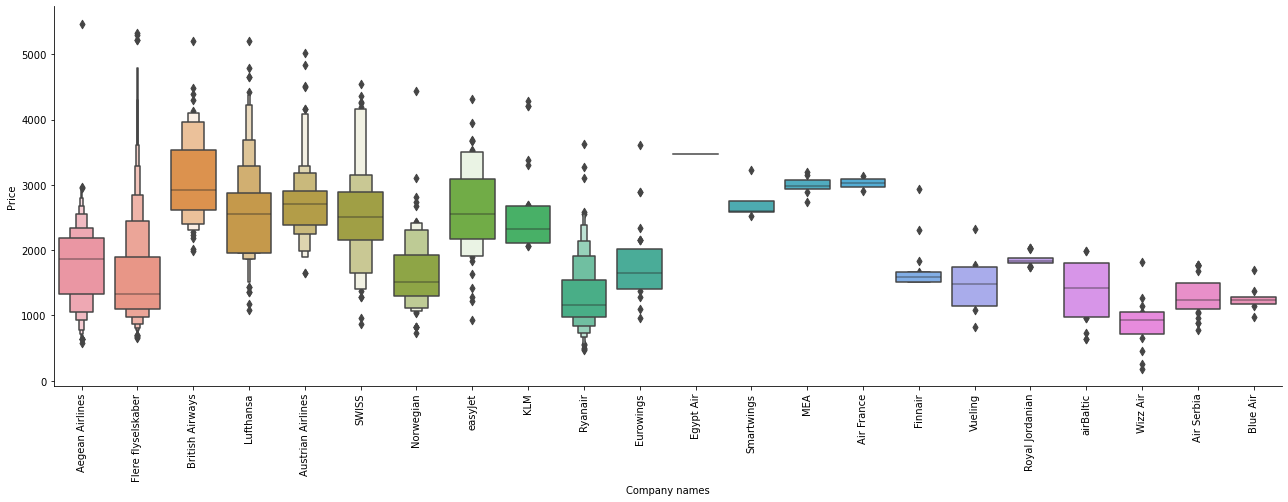

In [9]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
df['Company names'] = df['Company names'].astype(str)

chart = sns.catplot(y = "Price", x = "Company names", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
chart.set_xticklabels(rotation=90)
plt.show()

In [10]:
df

,Unnamed: 0,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names
26,26,63cy,2022-07-25,7t. 10min.,1 stop ATH,11:25–19:35,Aegean Airlines,5469,https://kayak.dk/book/flight?code=ShAilJe5f-.R...,20220506-2249,[Aegean Airlines]
75,75,63cy,2022-07-16,9t. 25min.,"2 stop FRA, ATH",14:55–01:20+1,Flere flyselskaber,5330,https://kayak.dk/book/flight?code=SfCiIAnLeo.f...,20220506-2157,"[SAS, Aegean Airlines]"
74,74,63cy,2022-07-16,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5293,https://kayak.dk/book/flight?code=SfCiIAnLeo.t...,20220506-2157,"[SAS, Aegean Airlines]"
89,89,63cy,2022-07-30,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5222,https://kayak.dk/book/flight?code=SiAikpXBR-.t...,20220506-2306,"[SAS, Aegean Airlines]"
64,64,63cy,2022-07-17,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5220,https://kayak.dk/book/flight?code=SfDifPla15.t...,20220506-2201,"[SAS, Aegean Airlines]"
...,...,...,...,...,...,...,...,...,...,...,...
0,0,63cy,2022-07-21,14t. 30min.,1 stop GDN,07:50–23:20,Ryanair,480,https://kayak.dk/s/clickthrough.jsp?ctyp=Spons...,20220506-2236,[Ryanair]
2,2,63cy,2022-07-21,14t. 30min.,1 stop GDN,07:50–23:20,Ryanair,473,https://kayak.dk/book/flight?code=ShACTHZH0h.e...,20220506-2236,[Ryanair]
0,0,63cy,2022-08-14,4t. 05min.,direkte,20:35–01:40+1,Wizz Air,449,https://kayak.dk/book/flight?code=SjACRfks9x.H...,20220506-2335,[Wizz Air]
0,0,63cy,2022-08-07,4t. 05min.,direkte,20:35–01:40+1,Wizz Air,256,https://kayak.dk/s/clickthrough.jsp?ctyp=Spons...,20220506-2313,[Wizz Air]


In [11]:
#pd.set_option('display.max_colwidth', None)
print(df[df.Price == df.Price.max()])
print(df[df.Price == df.Price.min()])
df

    Unnamed: 0 Destination    Out Date Out Duration    Out Stops     Out Time  \
26          26        63cy  2022-07-25  7t. 10min.   1 stop ATH   11:25–19:35   

      Company names  Price                                                Url  \
26  Aegean Airlines   5469  https://kayak.dk/book/flight?code=ShAilJe5f-.R...   

        timestamp temp Company names  
26  20220506-2249  [Aegean Airlines]  
   Unnamed: 0 Destination    Out Date Out Duration Out Stops       Out Time  \
1           1        63cy  2022-08-07  4t. 05min.   direkte   20:35–01:40+1   

  Company names  Price                                                Url  \
1      Wizz Air    187  https://kayak.dk/book/flight?code=SiCCUS-HO_.1...   

       timestamp temp Company names  
1  20220506-2313         [Wizz Air]  


,Unnamed: 0,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names
26,26,63cy,2022-07-25,7t. 10min.,1 stop ATH,11:25–19:35,Aegean Airlines,5469,https://kayak.dk/book/flight?code=ShAilJe5f-.R...,20220506-2249,[Aegean Airlines]
75,75,63cy,2022-07-16,9t. 25min.,"2 stop FRA, ATH",14:55–01:20+1,Flere flyselskaber,5330,https://kayak.dk/book/flight?code=SfCiIAnLeo.f...,20220506-2157,"[SAS, Aegean Airlines]"
74,74,63cy,2022-07-16,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5293,https://kayak.dk/book/flight?code=SfCiIAnLeo.t...,20220506-2157,"[SAS, Aegean Airlines]"
89,89,63cy,2022-07-30,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5222,https://kayak.dk/book/flight?code=SiAikpXBR-.t...,20220506-2306,"[SAS, Aegean Airlines]"
64,64,63cy,2022-07-17,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5220,https://kayak.dk/book/flight?code=SfDifPla15.t...,20220506-2201,"[SAS, Aegean Airlines]"
...,...,...,...,...,...,...,...,...,...,...,...
0,0,63cy,2022-07-21,14t. 30min.,1 stop GDN,07:50–23:20,Ryanair,480,https://kayak.dk/s/clickthrough.jsp?ctyp=Spons...,20220506-2236,[Ryanair]
2,2,63cy,2022-07-21,14t. 30min.,1 stop GDN,07:50–23:20,Ryanair,473,https://kayak.dk/book/flight?code=ShACTHZH0h.e...,20220506-2236,[Ryanair]
0,0,63cy,2022-08-14,4t. 05min.,direkte,20:35–01:40+1,Wizz Air,449,https://kayak.dk/book/flight?code=SjACRfks9x.H...,20220506-2335,[Wizz Air]
0,0,63cy,2022-08-07,4t. 05min.,direkte,20:35–01:40+1,Wizz Air,256,https://kayak.dk/s/clickthrough.jsp?ctyp=Spons...,20220506-2313,[Wizz Air]


### Lowest prices on 3 days

In [12]:
df.nsmallest(3, 'Price')
#top_2 = df.groupby('Name')['Score'].apply(lambda x: x.nsmallest(2)).reset_index('Name')
print(df[df['Out Date']=='2022-07-19'].nsmallest(3, 'Price')['Price'])
print(df[df['Out Date']=='2022-07-20'].nsmallest(3, 'Price')['Price'])
print(df[df['Out Date']=='2022-07-21'].nsmallest(3, 'Price')['Price'])

1     819
50    820
0     844
Name: Price, dtype: int64
2     632
34    646
0     724
Name: Price, dtype: int64
2     473
0     480
76    679
Name: Price, dtype: int64


### Lowest prices on 30 days

In [13]:
# consider the start date as 2021-february 1 st
start_date = datetime.date(2022, 7, 19)

# consider the end date as 2021-march 1 st
end_date = datetime.date(2022, 8, 15)

# delta time
delta = datetime.timedelta(days=1)

while (start_date <= end_date):
    from_date = start_date.strftime("%Y-%m-%d")
    print(from_date,df[df['Out Date']==from_date].nsmallest(2, 'Price')['Price'])
    start_date += delta

2022-07-19 1     819
50    820
Name: Price, dtype: int64
2022-07-20 2     632
34    646
Name: Price, dtype: int64
2022-07-21 2    473
0    480
Name: Price, dtype: int64
2022-07-22 85     947
86    1005
Name: Price, dtype: int64
2022-07-23 23    849
52    850
Name: Price, dtype: int64
2022-07-24 69    989
70    989
Name: Price, dtype: int64
2022-07-25 30    770
31    790
Name: Price, dtype: int64
2022-07-26 86    727
87    727
Name: Price, dtype: int64
2022-07-27 108    626
109    697
Name: Price, dtype: int64
2022-07-28 61    665
62    795
Name: Price, dtype: int64
2022-07-29 74    924
75    960
Name: Price, dtype: int64
2022-07-30 36    649
90    828
Name: Price, dtype: int64
2022-07-31 1    1054
0    1429
Name: Price, dtype: int64
2022-08-01 0    1429
2    3147
Name: Price, dtype: int64
2022-08-02 2     875
0    1060
Name: Price, dtype: int64
2022-08-03 2    1981
0    2375
Name: Price, dtype: int64
2022-08-04 2    1981
0    2542
Name: Price, dtype: int64
2022-08-05 0     577
1    212

### Categorizing deptare times

In [14]:
#Parts of the Day
#Morning     5 am to 12 pm (noon)

#Early morning    5 to 8 am
#Late morning     11 am to 12pm
#Afternoon     12 pm to 5 pm

#Early afternoon   1 to 3pm
#Late afternoon    4 to 5pm

#Evening     5 pm to 9 pm
#Early evening   5 to 7 pm
#Night         9 pm to 4 am
def time_category (row):
    time = row['Out Time'][:2]
    time = int(time)
    if ((time >= 5) and (time <= 8)):
        return 'Early morning'
    if ((time > 8) and (time < 11)):
        return 'Morning'
    if((time >= 11) and (time <= 12)):
        return 'Late Morning'
    if ((time >= 13) and (time <= 15)):
        return 'Early afternoon'
    if ((time > 15) and (time <= 17)):
        return 'Late afternoon'
    if ((time > 17) and (time <= 19)):
        return 'Early evening'
    if ((time > 19) and (time <= 22)):
        return 'Late evening'
        
    return 'Night'
        
df['part of the day'] = df.apply(lambda row: time_category(row), axis=1)
df.groupby('part of the day')['Price'].mean()

part of the day
Early afternoon    1936.845890
Early evening      1808.490654
Early morning      2007.593882
Late Morning       1740.163435
Late afternoon     1842.714286
Late evening       1563.170483
Morning            2060.322767
Night              1754.507937
Name: Price, dtype: float64

In [15]:
df['part of the day'].value_counts()

Early morning      948
Late evening       393
Late Morning       361
Morning            347
Early afternoon    292
Late afternoon     273
Early evening      214
Night               63
Name: part of the day, dtype: int64

### Heatmap 

<AxesSubplot:>

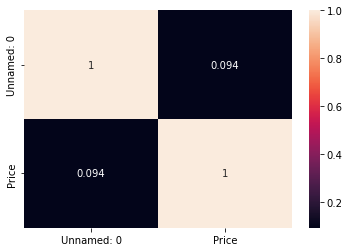

In [16]:
sns.heatmap(df.corr(), annot=True)

### Barchart showing the mean prices of each category

<AxesSubplot:ylabel='part of the day'>

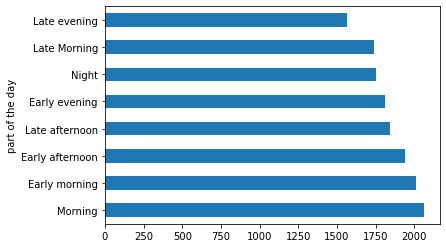

In [17]:
#df.groupby('part of the day')['Price'].mean().plot(kind='barh')
df.groupby('part of the day')['Price'].mean().sort_values(ascending=False).plot(kind='barh')


### How does the departure weekday affect the price?

### How does the amount of stops affect the price?

<AxesSubplot:ylabel='Out Stops number'>

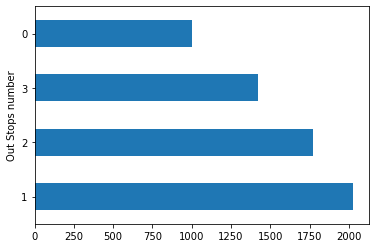

In [18]:
#direkte = 0, 1 stop = 1, 2 stop = 2
#search(substring, fullstring)
from re import search

def stop_category (row):
    if search('direkte',row['Out Stops']):
        return 0
    if (row['Out Stops'] != 'direkte'):
        return row['Out Stops'][:1]

df['Out Stops number'] = df.apply(lambda row: stop_category(row), axis=1)
#df.groupby('Out Stops number')['Price'].mean()
df.groupby('Out Stops number')['Price'].mean().sort_values(ascending=False).plot(kind='barh')

In [19]:
df.nsmallest(2, 'Price')['Price']

1    187
0    256
Name: Price, dtype: int64

In [20]:
# Who scored more points ?
df[df['Out Date']=='2022-07-19'].nsmallest(3, 'Price')['Price']
email_df = df[df.Price == df.Price].nsmallest(5, 'Price')
email_df

,Unnamed: 0,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names,part of the day,Out Stops number
1,1,63cy,2022-08-07,4t. 05min.,direkte,20:35–01:40+1,Wizz Air,187,https://kayak.dk/book/flight?code=SiCCUS-HO_.1...,20220506-2313,[Wizz Air],Late evening,0
0,0,63cy,2022-08-07,4t. 05min.,direkte,20:35–01:40+1,Wizz Air,256,https://kayak.dk/s/clickthrough.jsp?ctyp=Spons...,20220506-2313,[Wizz Air],Late evening,0
0,0,63cy,2022-08-14,4t. 05min.,direkte,20:35–01:40+1,Wizz Air,449,https://kayak.dk/book/flight?code=SjACRfks9x.H...,20220506-2335,[Wizz Air],Late evening,0
2,2,63cy,2022-07-21,14t. 30min.,1 stop GDN,07:50–23:20,Ryanair,473,https://kayak.dk/book/flight?code=ShACTHZH0h.e...,20220506-2236,[Ryanair],Early morning,1
0,0,63cy,2022-07-21,14t. 30min.,1 stop GDN,07:50–23:20,Ryanair,480,https://kayak.dk/s/clickthrough.jsp?ctyp=Spons...,20220506-2236,[Ryanair],Early morning,1


## New dataset for airline ratings etc

In [21]:
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.classify import SklearnClassifier

#from torchtext.data.utils import get_tokenizer
#from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset

ModuleNotFoundError: No module named 'torch'

In [23]:
filename = "airline.csv"
df_rating = pd.read_csv(filename)
#df_rating.loc[df['airline_name'].str.contains('egyptair'), 'egypt-air']
#df_rating['airline_name'].mask(df['airline_name'].str.contains('egyptair'), 'egypt-air', inplace=True)
#test = df_rating['airline_name']
#test.str.contains('egyptair'), 'egypt-air', inplace=True)
df_rating.airline_name.str.replace('(egyptair)', 'egypt-air')
#df_rating['airline_name'] = 'egypt-air'
df_rating.head()

/var/folders/d5/029s43s93fq8y41q591jyp1c0000gn/T/ipykernel_64588/2812462257.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_rating.airline_name.str.replace('(egyptair)', 'egypt-air')


,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,NaN,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,NaN,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0


In [24]:
#Indeler sentiment værdi ud fra overall_rating
#Positiv - Negativ - Neutral
neutral_range = {"low": 5, "high": 7}
df_rating["sentiment"] = "neutral"
df_rating["sentiment"].loc[df_rating["overall_rating"] < neutral_range["low"]] = "negative"
df_rating["sentiment"].loc[df_rating["overall_rating"] >= neutral_range["high"]] = "positive"
df_rating.head()

/Users/mathiaspoulsen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,...,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,sentiment
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,...,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1,positive
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,...,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1,positive
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,...,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1,positive
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,...,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1,positive
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,...,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0,negative


In [25]:
#Tjekker længden af "content"
df_rating['length'] = df_rating['content'].apply(len)
df_rating.head()

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,...,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,sentiment,length
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,...,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1,positive,424
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,...,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1,positive,141
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,...,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1,positive,249
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,...,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1,positive,439
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,...,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0,negative,675


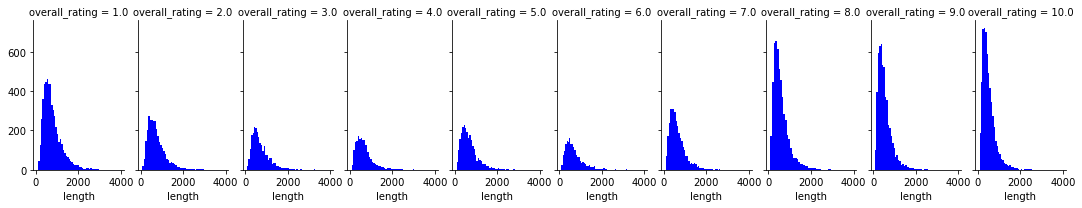

In [26]:
#Sammenligner textlængden af "content" med overall_rating
graph = sns.FacetGrid(data=df_rating,col='overall_rating', aspect= 0.5)
graph.map(plt.hist,'length',bins=50,color='blue')
##Evt også lav procentvis

In [27]:
X_train, X_validation, y_train, y_validation = train_test_split(df_rating["content"], df_rating["sentiment"], test_size=0.2,
stratify=df_rating["sentiment"])

filename = df_rating[['content', 'sentiment']]

# splitter dataset til train og et test dataset
train, test = train_test_split(filename,test_size = 0.1)

# fjerner neutrale sentiments
train = train[train.sentiment != "neutral"]

train_pos = train[ train['sentiment'] == 'positive']
train_pos = train_pos['content']

train_neg = train[ train['sentiment'] == 'negative']
train_neg = train_neg['content']
train.head()

NameError: name 'train_test_split' is not defined

Positive words


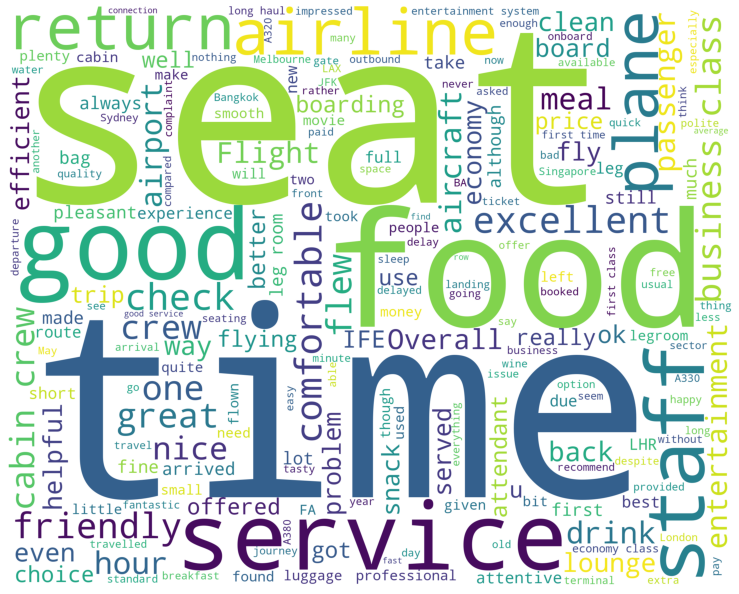

Negative words


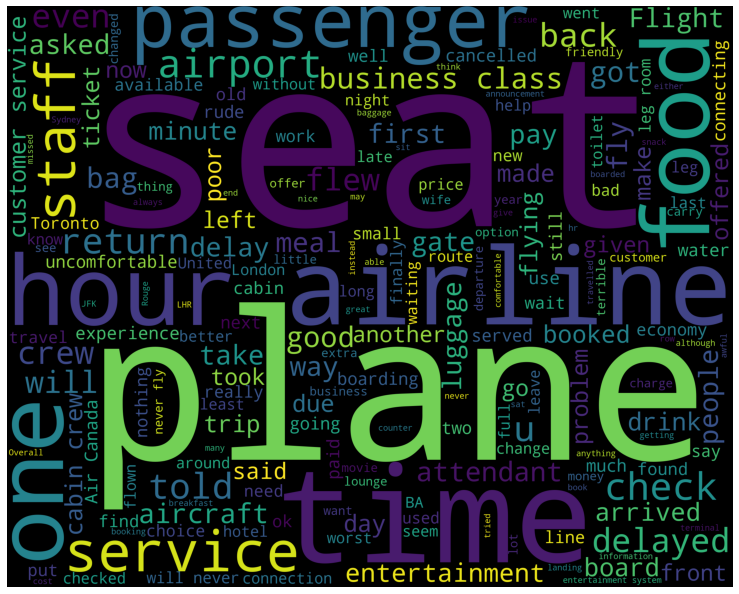

In [8]:
def wordcloud_draw(filename, color = 'black'):
    words = ' '.join(filename)
    cleaned_word = " ".join([word for word in words.split()
                            if 'flight' not in word
                                and not word.startswith('jfk')
                            ])
    wordcloud = WordCloud(
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

,Unnamed: 0,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names,part of the day,Out Stops number
26,26,63cy,2022-07-25,7t. 10min.,1 stop ATH,11:25–19:35,Aegean Airlines,5469,https://kayak.dk/book/flight?code=ShAilJe5f-.R...,20220506-2249,[Aegean Airlines],Late Morning,1
75,75,63cy,2022-07-16,9t. 25min.,"2 stop FRA, ATH",14:55–01:20+1,Flere flyselskaber,5330,https://kayak.dk/book/flight?code=SfCiIAnLeo.f...,20220506-2157,"[SAS, Aegean Airlines]",Early afternoon,2
74,74,63cy,2022-07-16,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5293,https://kayak.dk/book/flight?code=SfCiIAnLeo.t...,20220506-2157,"[SAS, Aegean Airlines]",Early morning,2
89,89,63cy,2022-07-30,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5222,https://kayak.dk/book/flight?code=SiAikpXBR-.t...,20220506-2306,"[SAS, Aegean Airlines]",Early morning,2
64,64,63cy,2022-07-17,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5220,https://kayak.dk/book/flight?code=SfDifPla15.t...,20220506-2201,"[SAS, Aegean Airlines]",Early morning,2
68,68,63cy,2022-07-24,7t. 45min.,1 stop LHR,16:30–01:15+1,British Airways,5202,https://kayak.dk/book/flight?code=ShBCIzkvOs.v...,20220506-2246,[British Airways],Late afternoon,1
25,25,63cy,2022-07-25,7t. 40min.,1 stop MUC,06:10–14:50,Lufthansa,5200,https://kayak.dk/book/flight?code=ShAilJe5f-.Z...,20220506-2249,[Lufthansa],Early morning,1
51,51,63cy,2022-07-23,5t. 45min.,1 stop VIE,09:50–16:35,Austrian Airlines,5027,https://kayak.dk/book/flight?code=ShBij_aZzv.F...,20220506-2243,[Austrian Airlines],Morning,1
73,73,63cy,2022-07-16,8t. 30min.,1 stop VIE,07:05–16:35,Austrian Airlines,4832,https://kayak.dk/book/flight?code=SfCiIAnLeo.7...,20220506-2157,[Austrian Airlines],Early morning,1
72,72,63cy,2022-07-16,8t. 40min.,1 stop FRA,06:20–16:00,Lufthansa,4792,https://kayak.dk/book/flight?code=SfCiIAnLeo.4...,20220506-2157,[Lufthansa],Early morning,1


In [41]:
#
uniqueAirlines = df['Company names'].unique()
df['Company names'] = [x.replace(" ","-").lower() for x in df['Company names']]

df['Company names'].mask(df['Company names'].str.contains('klm'), 'klm-royal-dutch-airlines', inplace=True)
df['Company names'].mask(df['Company names'].str.contains('swiss'), 'swiss-international-air-lines', inplace=True)
df['Company names'].mask(df['Company names'].str.contains('mea'), 'mea-middle-east-airlines', inplace=True)
df['Company names'].mask(df['Company names'].str.contains('vueling'), 'vueling-airlines', inplace=True)
df['Company names'].mask(df['Company names'].str.contains('royal-jordanian'), 'royal-jordanian-airlines', inplace=True)
df['Company names'].mask(df['Company names'].str.contains('royal-jordanian'), 'royal-jordanian-airlines', inplace=True)
df['Company names'].mask(df['Company names'].str.contains('egypt-air'), 'egyptair', inplace=True)
df.head(50)

,Unnamed: 0,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names,part of the day,Out Stops number
26,26,63cy,2022-07-25,7t. 10min.,1 stop ATH,11:25–19:35,aegean-airlines,5469,https://kayak.dk/book/flight?code=ShAilJe5f-.R...,20220506-2249,[Aegean Airlines],Late Morning,1
75,75,63cy,2022-07-16,9t. 25min.,"2 stop FRA, ATH",14:55–01:20+1,flere-flyselskaber,5330,https://kayak.dk/book/flight?code=SfCiIAnLeo.f...,20220506-2157,"[SAS, Aegean Airlines]",Early afternoon,2
74,74,63cy,2022-07-16,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,flere-flyselskaber,5293,https://kayak.dk/book/flight?code=SfCiIAnLeo.t...,20220506-2157,"[SAS, Aegean Airlines]",Early morning,2
89,89,63cy,2022-07-30,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,flere-flyselskaber,5222,https://kayak.dk/book/flight?code=SiAikpXBR-.t...,20220506-2306,"[SAS, Aegean Airlines]",Early morning,2
64,64,63cy,2022-07-17,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,flere-flyselskaber,5220,https://kayak.dk/book/flight?code=SfDifPla15.t...,20220506-2201,"[SAS, Aegean Airlines]",Early morning,2
68,68,63cy,2022-07-24,7t. 45min.,1 stop LHR,16:30–01:15+1,british-airways,5202,https://kayak.dk/book/flight?code=ShBCIzkvOs.v...,20220506-2246,[British Airways],Late afternoon,1
25,25,63cy,2022-07-25,7t. 40min.,1 stop MUC,06:10–14:50,lufthansa,5200,https://kayak.dk/book/flight?code=ShAilJe5f-.Z...,20220506-2249,[Lufthansa],Early morning,1
51,51,63cy,2022-07-23,5t. 45min.,1 stop VIE,09:50–16:35,austrian-airlines,5027,https://kayak.dk/book/flight?code=ShBij_aZzv.F...,20220506-2243,[Austrian Airlines],Morning,1
73,73,63cy,2022-07-16,8t. 30min.,1 stop VIE,07:05–16:35,austrian-airlines,4832,https://kayak.dk/book/flight?code=SfCiIAnLeo.7...,20220506-2157,[Austrian Airlines],Early morning,1
72,72,63cy,2022-07-16,8t. 40min.,1 stop FRA,06:20–16:00,lufthansa,4792,https://kayak.dk/book/flight?code=SfCiIAnLeo.4...,20220506-2157,[Lufthansa],Early morning,1


In [42]:
#klm = klm-royal-dutch-airlines i vores andet dataset
#swiss = swiss-international-air-lines i vores andet dataset
#mea = mea-middle-east-airlines
#vueling = vueling-airlines
#royal-jordanian = royal-jordanian-airlines

uniqueAirlines = df['Company names'].unique()

In [44]:

uniqueAirlinesRating = df_rating['airline_name'].unique()


In [45]:
uniqueAirlines


array(['aegean-airlines', 'flere-flyselskaber', 'british-airways',
       'lufthansa', 'austrian-airlines', 'swiss-international-air-lines',
       'norwegian', 'easyjet', 'klm-royal-dutch-airlines', 'ryanair',
       'eurowings', 'egyptair', 'smartwings', 'mea-middle-east-airlines',
       'air-france', 'finnair', 'vueling-airlines',
       'royal-jordanian-airlines', 'airbaltic', 'wizz-air', 'air-serbia',
       'blue-air'], dtype=object)

In [46]:
uniqueAirlinesRating

array(['adria-airways', 'aegean-airlines', 'aer-lingus', 'aerocaribbean',
       'aeroflot-russian-airlines', 'aerolineas-argentinas', 'aeromexico',
       'aerosur', 'afriqiyah-airways', 'aigle-azur', 'air-algerie',
       'air-arabia', 'air-astana', 'air-austral', 'air-bagan',
       'air-berlin', 'air-botswana', 'air-busan', 'air-cairo-user',
       'air-canada', 'air-canada-rouge', 'air-caraibes', 'air-china',
       'air-corsica', 'air-dolomiti', 'air-europa', 'air-france',
       'air-greenland', 'air-india', 'air-india-express', 'air-koryo',
       'air-labrador', 'air-macau', 'air-madagascar', 'air-malawi',
       'air-malta', 'air-mauritius', 'air-mediterranee', 'air-memphis',
       'air-moldova', 'air-namibia', 'air-new-zealand', 'air-niugini',
       'air-north-yukons-airline', 'air-nostrum', 'air-serbia',
       'air-seychelles', 'air-tahiti-nui', 'air-transat', 'air-vanuata',
       'air-zimbabwe', 'airasia', 'airasia-x', 'airasia-zest',
       'airbaltic', 'air-blue', 'a

In [56]:
#Find gennemsnit af rating for de forskellige selskaber
gennemsnit = df_rating.groupby('airline_name')['overall_rating'].mean().apply(float).to_dict()
#gennemsnit.to_dict('dict')
gennemsnit
gennemsnit['lufthansa']

6.993333333333333

In [64]:
def add_rating (row):
    NaN = float("NaN")
    airline_name = row['Company names']
    if(airline_name == 'flere-flyselskaber'):
        return NaN
    else:
        return gennemsnit[airline_name]
    

    #df['rating'] = gennemsnit[airline_name] #gennemsnits keys (bliver fundet via airline name) value (wizz-air = 7)
        
        
df['rating'] = df.apply(lambda row: add_rating(row), axis=1)
df.head(50)

#df.groupby('part of the day')['Price'].mean()




,Unnamed: 0,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names,part of the day,Out Stops number,rating
26,26,63cy,2022-07-25,7t. 10min.,1 stop ATH,11:25–19:35,aegean-airlines,5469,https://kayak.dk/book/flight?code=ShAilJe5f-.R...,20220506-2249,[Aegean Airlines],Late Morning,1,7.823789
75,75,63cy,2022-07-16,9t. 25min.,"2 stop FRA, ATH",14:55–01:20+1,flere-flyselskaber,5330,https://kayak.dk/book/flight?code=SfCiIAnLeo.f...,20220506-2157,"[SAS, Aegean Airlines]",Early afternoon,2,NaN
74,74,63cy,2022-07-16,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,flere-flyselskaber,5293,https://kayak.dk/book/flight?code=SfCiIAnLeo.t...,20220506-2157,"[SAS, Aegean Airlines]",Early morning,2,NaN
89,89,63cy,2022-07-30,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,flere-flyselskaber,5222,https://kayak.dk/book/flight?code=SiAikpXBR-.t...,20220506-2306,"[SAS, Aegean Airlines]",Early morning,2,NaN
64,64,63cy,2022-07-17,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,flere-flyselskaber,5220,https://kayak.dk/book/flight?code=SfDifPla15.t...,20220506-2201,"[SAS, Aegean Airlines]",Early morning,2,NaN
68,68,63cy,2022-07-24,7t. 45min.,1 stop LHR,16:30–01:15+1,british-airways,5202,https://kayak.dk/book/flight?code=ShBCIzkvOs.v...,20220506-2246,[British Airways],Late afternoon,1,5.881696
25,25,63cy,2022-07-25,7t. 40min.,1 stop MUC,06:10–14:50,lufthansa,5200,https://kayak.dk/book/flight?code=ShAilJe5f-.Z...,20220506-2249,[Lufthansa],Early morning,1,6.993333
51,51,63cy,2022-07-23,5t. 45min.,1 stop VIE,09:50–16:35,austrian-airlines,5027,https://kayak.dk/book/flight?code=ShBij_aZzv.F...,20220506-2243,[Austrian Airlines],Morning,1,6.110266
73,73,63cy,2022-07-16,8t. 30min.,1 stop VIE,07:05–16:35,austrian-airlines,4832,https://kayak.dk/book/flight?code=SfCiIAnLeo.7...,20220506-2157,[Austrian Airlines],Early morning,1,6.110266
72,72,63cy,2022-07-16,8t. 40min.,1 stop FRA,06:20–16:00,lufthansa,4792,https://kayak.dk/book/flight?code=SfCiIAnLeo.4...,20220506-2157,[Lufthansa],Early morning,1,6.993333
